In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

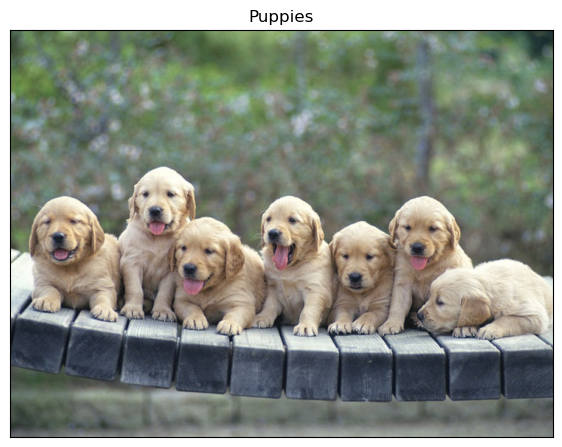

In [5]:
img = cv2.imread("puppies.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразуем в RGB
plt.figure(figsize=(7, 7))
plt.imshow(img_rgb)
plt.title("Puppies")
plt.xticks([])
plt.yticks([]);

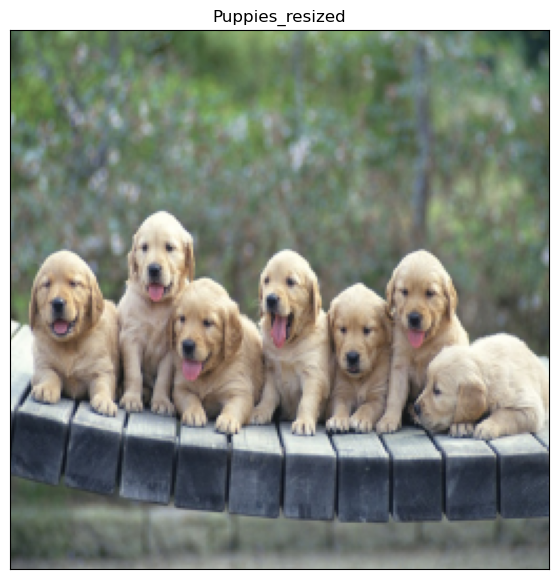

In [6]:
img_resized = cv2.resize(img_rgb, (256, 256), interpolation=cv2.INTER_AREA) # Изменяем размер изображения
plt.figure(figsize=(7, 7))
plt.imshow(img_resized)
plt.title("Puppies_resized")
plt.xticks([])
plt.yticks([]);

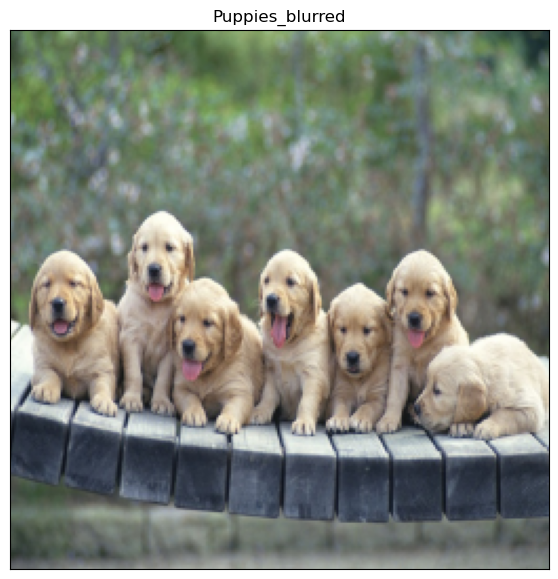

In [7]:
img_blurred = cv2.bilateralFilter(img_resized, d=-1, sigmaColor=150, sigmaSpace=150) # Билинейная фильтрация, сглаживаем изображение, d - диаметр пикселей соседства, sigmaColor - интенсивность учёта различия в цвете, sigmaSpace - интенсивность учёта расстояния между пикселями 
plt.figure(figsize=(7, 7))
plt.imshow(img_resized)
plt.title("Puppies_blurred")
plt.xticks([])
plt.yticks([]);

In [ ]:
# img_masked = cv2.adaptiveThreshold(
#     cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY),  # Преобразование в серый
#     maxValue=255,
#     adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     thresholdType=cv2.THRESH_BINARY,
#     blockSize=51,  # Размер блока
#     C=3           # Корректировка
# ) # Выделение объектов на изображении. Применяется, т.к. фон неоднородный
# plt.figure(figsize=(7, 7))
# plt.imshow(img_masked)
# plt.title("Puppies_blurred")
# plt.xticks([])
# plt.yticks([]);

True

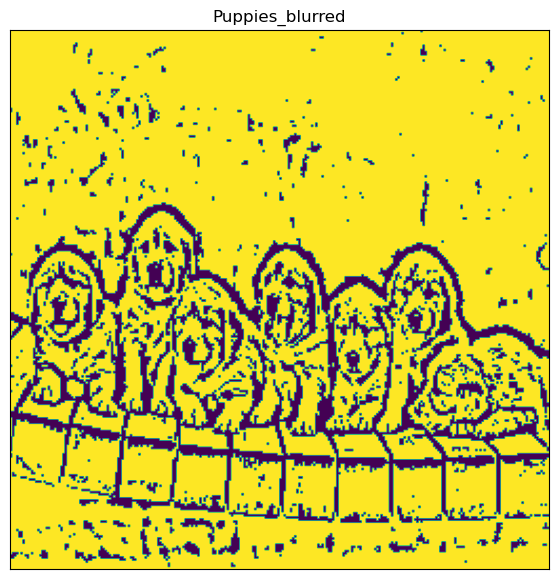

In [10]:
img_masked = cv2.adaptiveThreshold(
    cv2.cvtColor(img_blurred, cv2.COLOR_BGR2GRAY),  # Преобразование в серый
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,  # Размер блока
    C=3           # Корректировка
) # Выделение объектов на изображении. Применяется, т.к. фон неоднородный
plt.figure(figsize=(7, 7))
plt.imshow(img_masked)
plt.title("Puppies_blurred")
plt.xticks([])
plt.yticks([]);
cv2.imwrite(f"mask.jpg", img_masked)

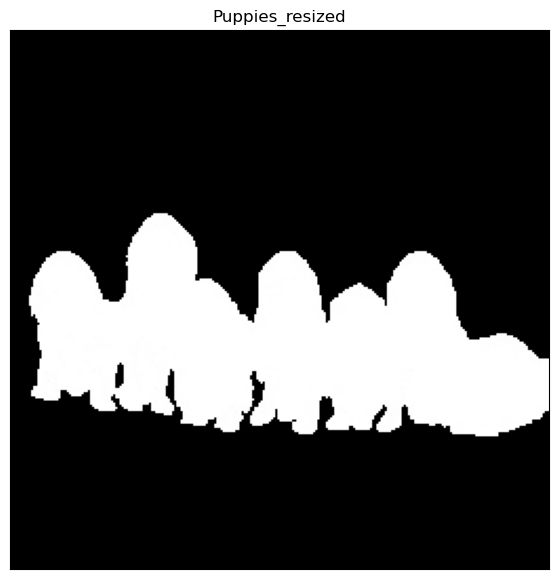

In [9]:
img_masked = cv2.imread("mask_new.jpg")
plt.figure(figsize=(7, 7))
plt.imshow(img_masked)
plt.title("Puppies_resized")
plt.xticks([])
plt.yticks([]);

In [23]:
os.makedirs("imgs", exist_ok=True)
os.makedirs("masks", exist_ok=True)

sizes = img_masked.shape[:2]
center = tuple(map(int, (sizes[0]/2, sizes[1]/2)))


for i in tqdm(range(1, 101, 1)):
    key_value = np.random.choice(np.arange(1, 4))
    if key_value == 1:
        # Поворот
        rotation_matrix = cv2.getRotationMatrix2D(center, np.random.randint(0, 360), 1) # center, angle, scale
        rotated_img_default = cv2.warpAffine(img_blurred, rotation_matrix, (sizes[1], sizes[0])) # src - исходное изображение, M - матрица афинного преобразования, (weight, height)
        rotated_img_masked = cv2.warpAffine(img_masked, rotation_matrix, (sizes[1], sizes[0]))
        cv2.imwrite(f"imgs/{i}.jpg", rotated_img_default)
        cv2.imwrite(f"masks/{i}.jpg", rotated_img_masked)
        
    elif key_value == 2:
        # Изменение яркости и контраста
        alpha = np.random.uniform(0.7, 1.0)  # Контраст
        beta = np.random.randint(-20, 20)    # Яркость
        bright_img_default = cv2.convertScaleAbs(img_blurred, alpha=alpha, beta=beta)
        bright_img_masked = cv2.convertScaleAbs(img_masked, alpha=alpha, beta=beta)  # Маска остаётся неизменной
        cv2.imwrite(f"imgs/{i}.jpg", bright_img_default)
        cv2.imwrite(f"masks/{i}.jpg", bright_img_masked)
        
    elif key_value == 3:
        # Изменение резкости
        center_value = np.random.uniform(1, 3) # Центральное значение (усиливает резкость)
        neighbor_value = np.random.uniform(-0.2, -0.1) # Значение соседй (уменьшает размытие)
        sharpness_kernel = np.array([[0, neighbor_value, 0],
                             [neighbor_value, center_value, neighbor_value],
                             [0, neighbor_value, 0]])
        sharpened_img = cv2.filter2D(img_blurred, -1, sharpness_kernel)
        sharpened_mask = cv2.filter2D(img_masked, -1, sharpness_kernel)
        cv2.imwrite(f"imgs/{i}.jpg", sharpened_img)
        cv2.imwrite(f"masks/{i}.jpg", sharpened_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.79it/s]
